In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
!unzip  '/content/customer churn.zip'

Archive:  /content/customer churn.zip
  inflating: churn.csv               


In [108]:
data=pd.read_csv('churn.csv')

In [109]:
data

Unnamed: 0  age gender security_no region_category  \
0               0   18      F     XW0DQ7H         Village   
1               1   32      F     5K0N3X1            City   
2               2   44      F     1F2TCL3            Town   
3               3   37      M     VJGJ33N            City   
4               4   31      F     SVZXCWB            City   
...           ...  ...    ...         ...             ...   
36987       36987   46      F     6F51HFO             NaN   
36988       36988   29      F     21KSM8Y            Town   
36989       36989   23      F     XK1IM9H             NaN   
36990       36990   53      M     K6VTP1Z         Village   
36991       36991   35      M     LBX0GLR            Town   

       membership_category joining_date joined_through_referral referral_id  \
0      Platinum Membership   2017-08-17                      No    xxxxxxxx   
1       Premium Membership   2017-08-28                       ?    CID21329   
2            No Membership   2016-11-11                     Yes    CID12313   
3            No Membership   2016-10-29                     Yes     CID3793   
4            No Membership   2017-09-12                      No    xxxxxxxx   
...                    ...          ...                     ...         ...   
36987     Basic Membership   2017-09-21                      No    xxxxxxxx   
36988     Basic Membership   2016-06-27                      No    xxxxxxxx   
36989     Basic Membership   2016-09-11                     Yes     CID3838   
36990  Platinum Membership   2017-06-15                      No    xxxxxxxx   
36991    Silver Membership   2015-10-23                      No    xxxxxxxx   

          preferred_offer_types  ... avg_time_spent avg_transaction_value  \
0         Gift Vouchers/Coupons  ...     300.630000              53005.25   
1         Gift Vouchers/Coupons  ...     306.340000              12838.38   
2         Gift Vouchers/Coupons  ...     516.160000              21027.00   
3         Gift Vouchers/Coupons  ...      53.270000              25239.56   
4      Credit/Debit Card Offers  ...     113.130000              24483.66   
...                         ...  ...            ...                   ...   
36987  Credit/Debit Card Offers  ...    -650.682759              27277.68   
36988            Without Offers  ...    -638.123421              11069.71   
36989     Gift Vouchers/Coupons  ...     154.940000              38127.56   
36990     Gift Vouchers/Coupons  ...     482.610000               2378.86   
36991     Gift Vouchers/Coupons  ...      79.180000               2189.68   

      avg_frequency_login_days  points_in_wallet  used_special_discount  \
0                         17.0        781.750000                    Yes   
1                         10.0               NaN                    Yes   
2                         22.0        500.690000                     No   
3                          6.0        567.660000                     No   
4                         16.0        663.060000                     No   
...                        ...               ...                    ...   
36987                      6.0        639.510000                     No   
36988                     28.0        527.990000                    Yes   
36989                    Error        680.470000                     No   
36990                     20.0        197.264414                    Yes   
36991                    Error        719.970000                    Yes   

       offer_application_preference past_complaint          complaint_status  \
0                               Yes             No            Not Applicable   
1                                No            Yes                    Solved   
2                               Yes            Yes       Solved in Follow-up   
3                               Yes            Yes                  Unsolved   
4                               Yes            Yes                    Solved   
...                

In [110]:
data.head()

Unnamed: 0  age gender security_no region_category  membership_category  \
0           0   18      F     XW0DQ7H         Village  Platinum Membership   
1           1   32      F     5K0N3X1            City   Premium Membership   
2           2   44      F     1F2TCL3            Town        No Membership   
3           3   37      M     VJGJ33N            City        No Membership   
4           4   31      F     SVZXCWB            City        No Membership   

  joining_date joined_through_referral referral_id     preferred_offer_types  \
0   2017-08-17                      No    xxxxxxxx     Gift Vouchers/Coupons   
1   2017-08-28                       ?    CID21329     Gift Vouchers/Coupons   
2   2016-11-11                     Yes    CID12313     Gift Vouchers/Coupons   
3   2016-10-29                     Yes     CID3793     Gift Vouchers/Coupons   
4   2017-09-12                      No    xxxxxxxx  Credit/Debit Card Offers   

   ... avg_time_spent avg_transaction_value avg_frequency_login_days  \
0  ...         300.63              53005.25                     17.0   
1  ...         306.34              12838.38                     10.0   
2  ...         516.16              21027.00                     22.0   
3  ...          53.27              25239.56                      6.0   
4  ...         113.13              24483.66                     16.0   

   points_in_wallet  used_special_discount  offer_application_preference  \
0            781.75                    Yes                           Yes   
1               NaN                    Yes                            No   
2            500.69                     No                           Yes   
3            567.66                     No                           Yes   
4            663.06                     No                           Yes   

  past_complaint     complaint_status                  feedback  \
0             No       Not Applicable  Products always in Stock   
1            Yes               Solved     Quality Customer Care   
2            Yes  Solved in Follow-up              Poor Website   
3            Yes             Unsolved              Poor Website   
4            Yes               Solved              Poor Website   

  churn_risk_score  
0                0  
1                0  
2                1  
3                1  
4                1  

[5 rows x 24 columns]

In [111]:
data.describe()

Unnamed: 0           age  days_since_last_login  avg_time_spent  \
count  36992.000000  36992.000000           36992.000000    36992.000000   
mean   18495.500000     37.118161             -41.915576      243.472334   
std    10678.814916     15.867412             228.819900      398.289149   
min        0.000000     10.000000            -999.000000    -2814.109110   
25%     9247.750000     23.000000               8.000000       60.102500   
50%    18495.500000     37.000000              12.000000      161.765000   
75%    27743.250000     51.000000              16.000000      356.515000   
max    36991.000000     64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          0.540982  
std             19444.806226        194.063624          0.498324  
min               800.460000       -760.661236          0.000000  
25%             14177.540000        616.150000          0.000000  
50%             27554.485000        697.620000          1.000000  
75%             40855.110000        763.950000          1.000000  
max             99914.050000       2069.069761          1.000000

In [112]:
data.shape

(36992, 24)

In [113]:
data.dtypes

Unnamed: 0                        int64
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [114]:
data.columns

Index(['Unnamed: 0', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [116]:
data.isna().sum()

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

#EDA

<function matplotlib.pyplot.show(close=None, block=None)>

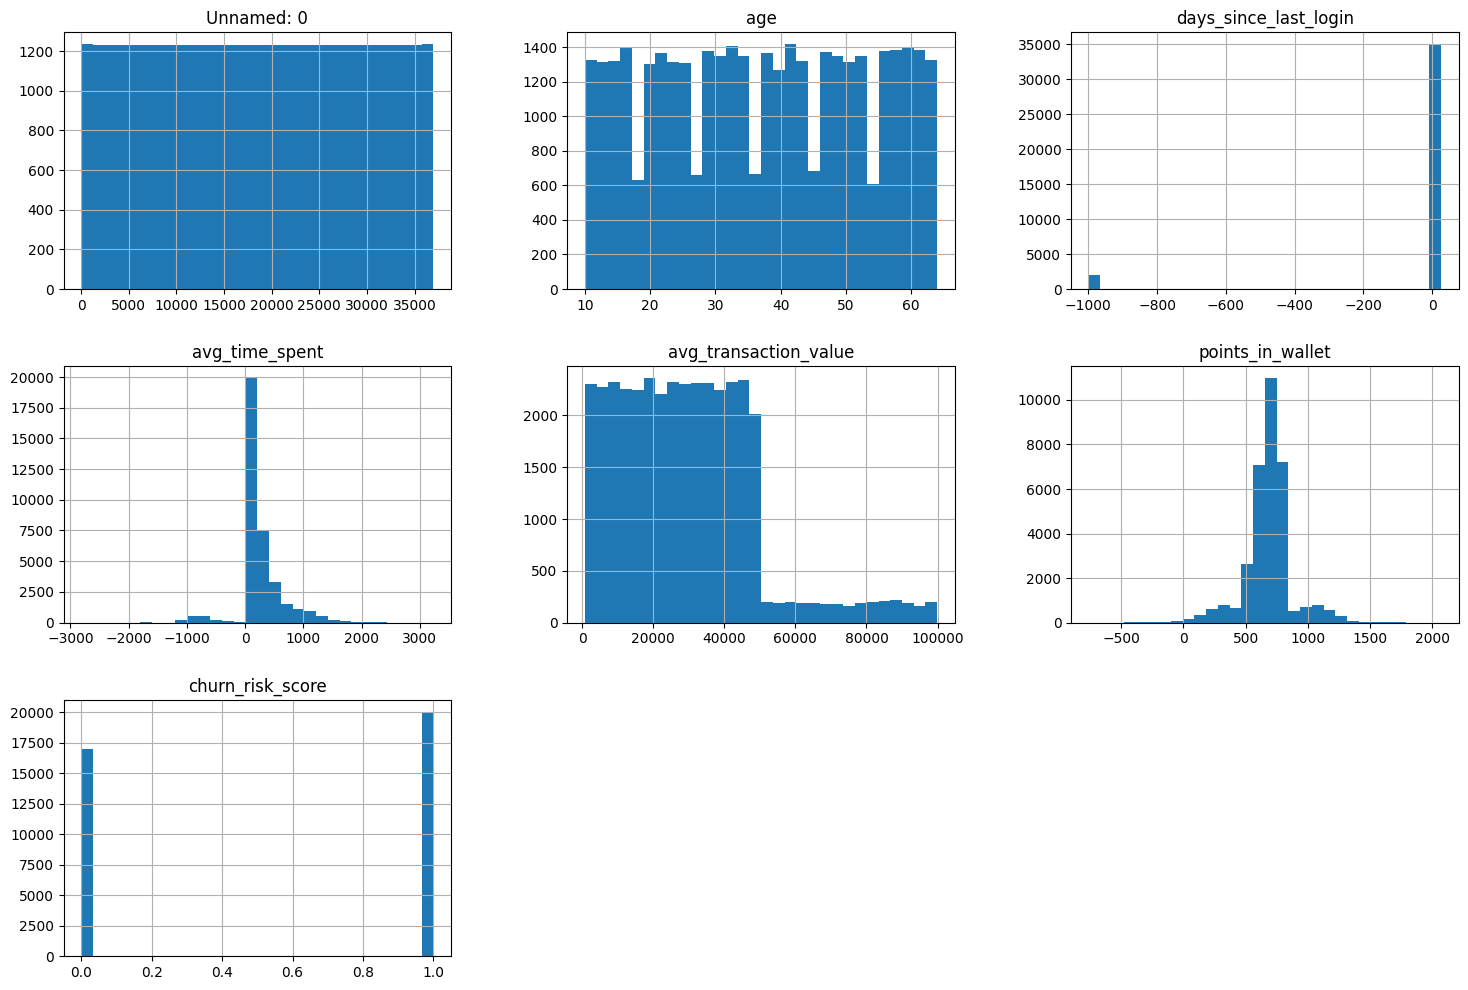

In [117]:
#histogram

data.hist(bins=30,figsize=(18,12))
plt.show

In [118]:
#piechart

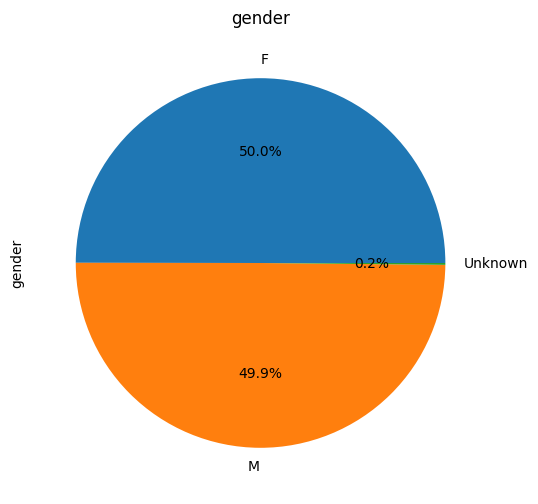

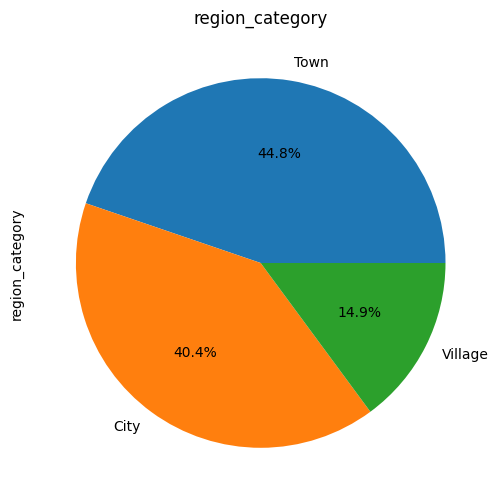

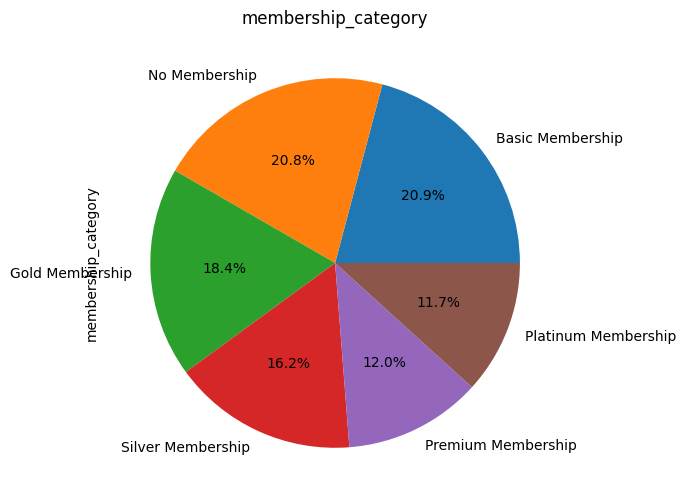

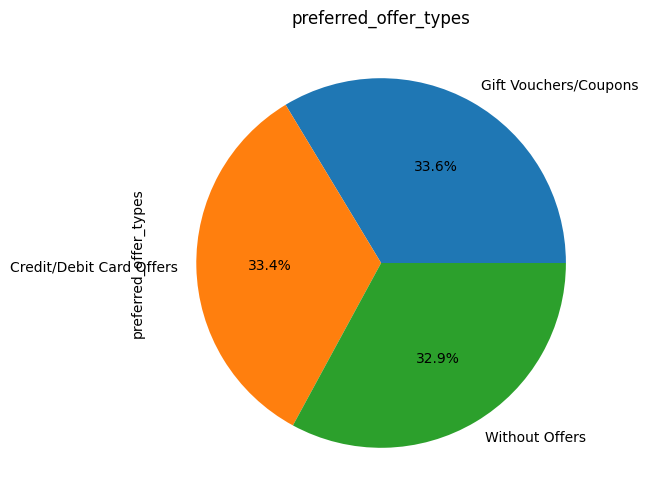

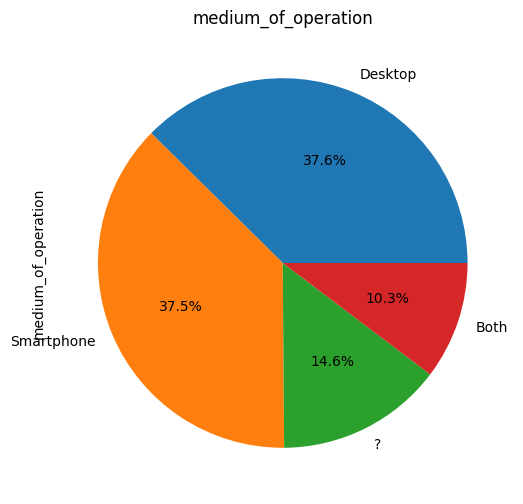

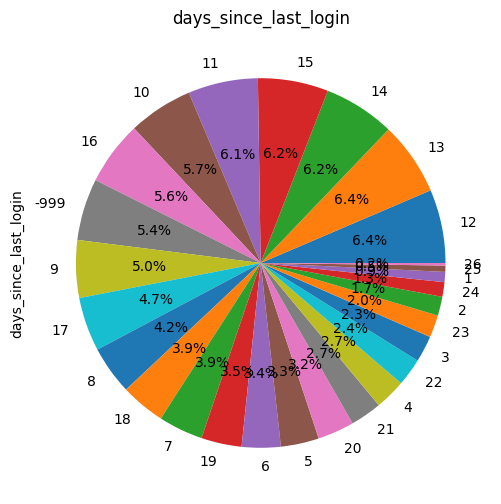

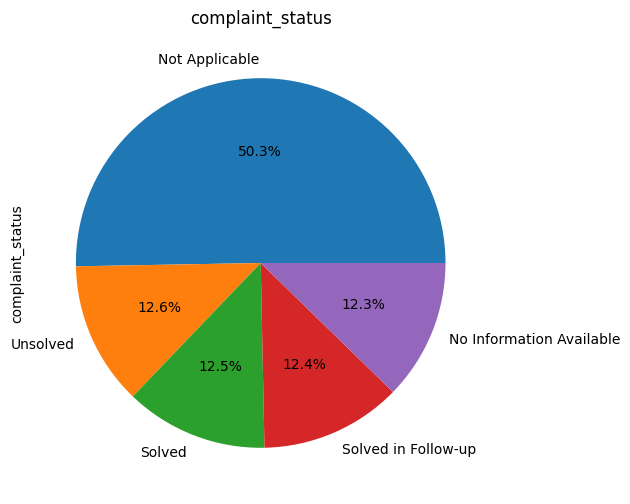

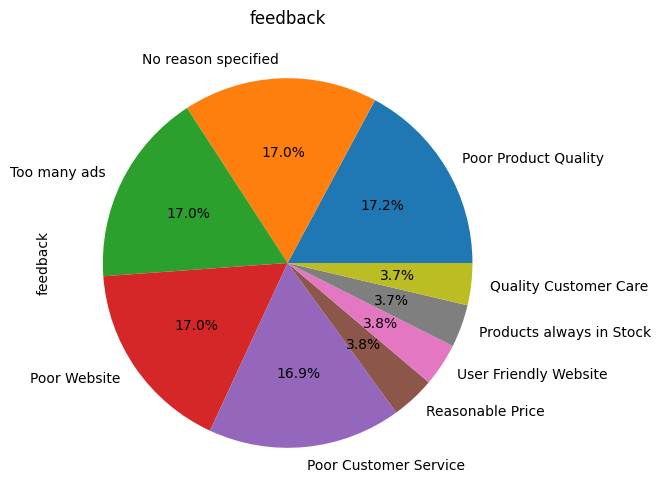

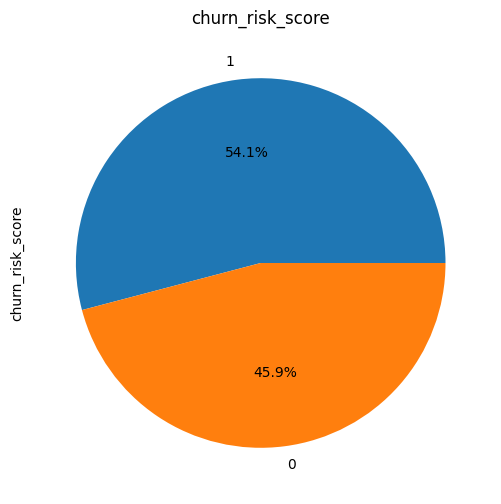

In [119]:
for i in['gender', 'region_category',
       'membership_category','joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
       'internet_option','days_since_last_login','used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score']:
       data[i].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
       plt.title(i)
       plt.show()

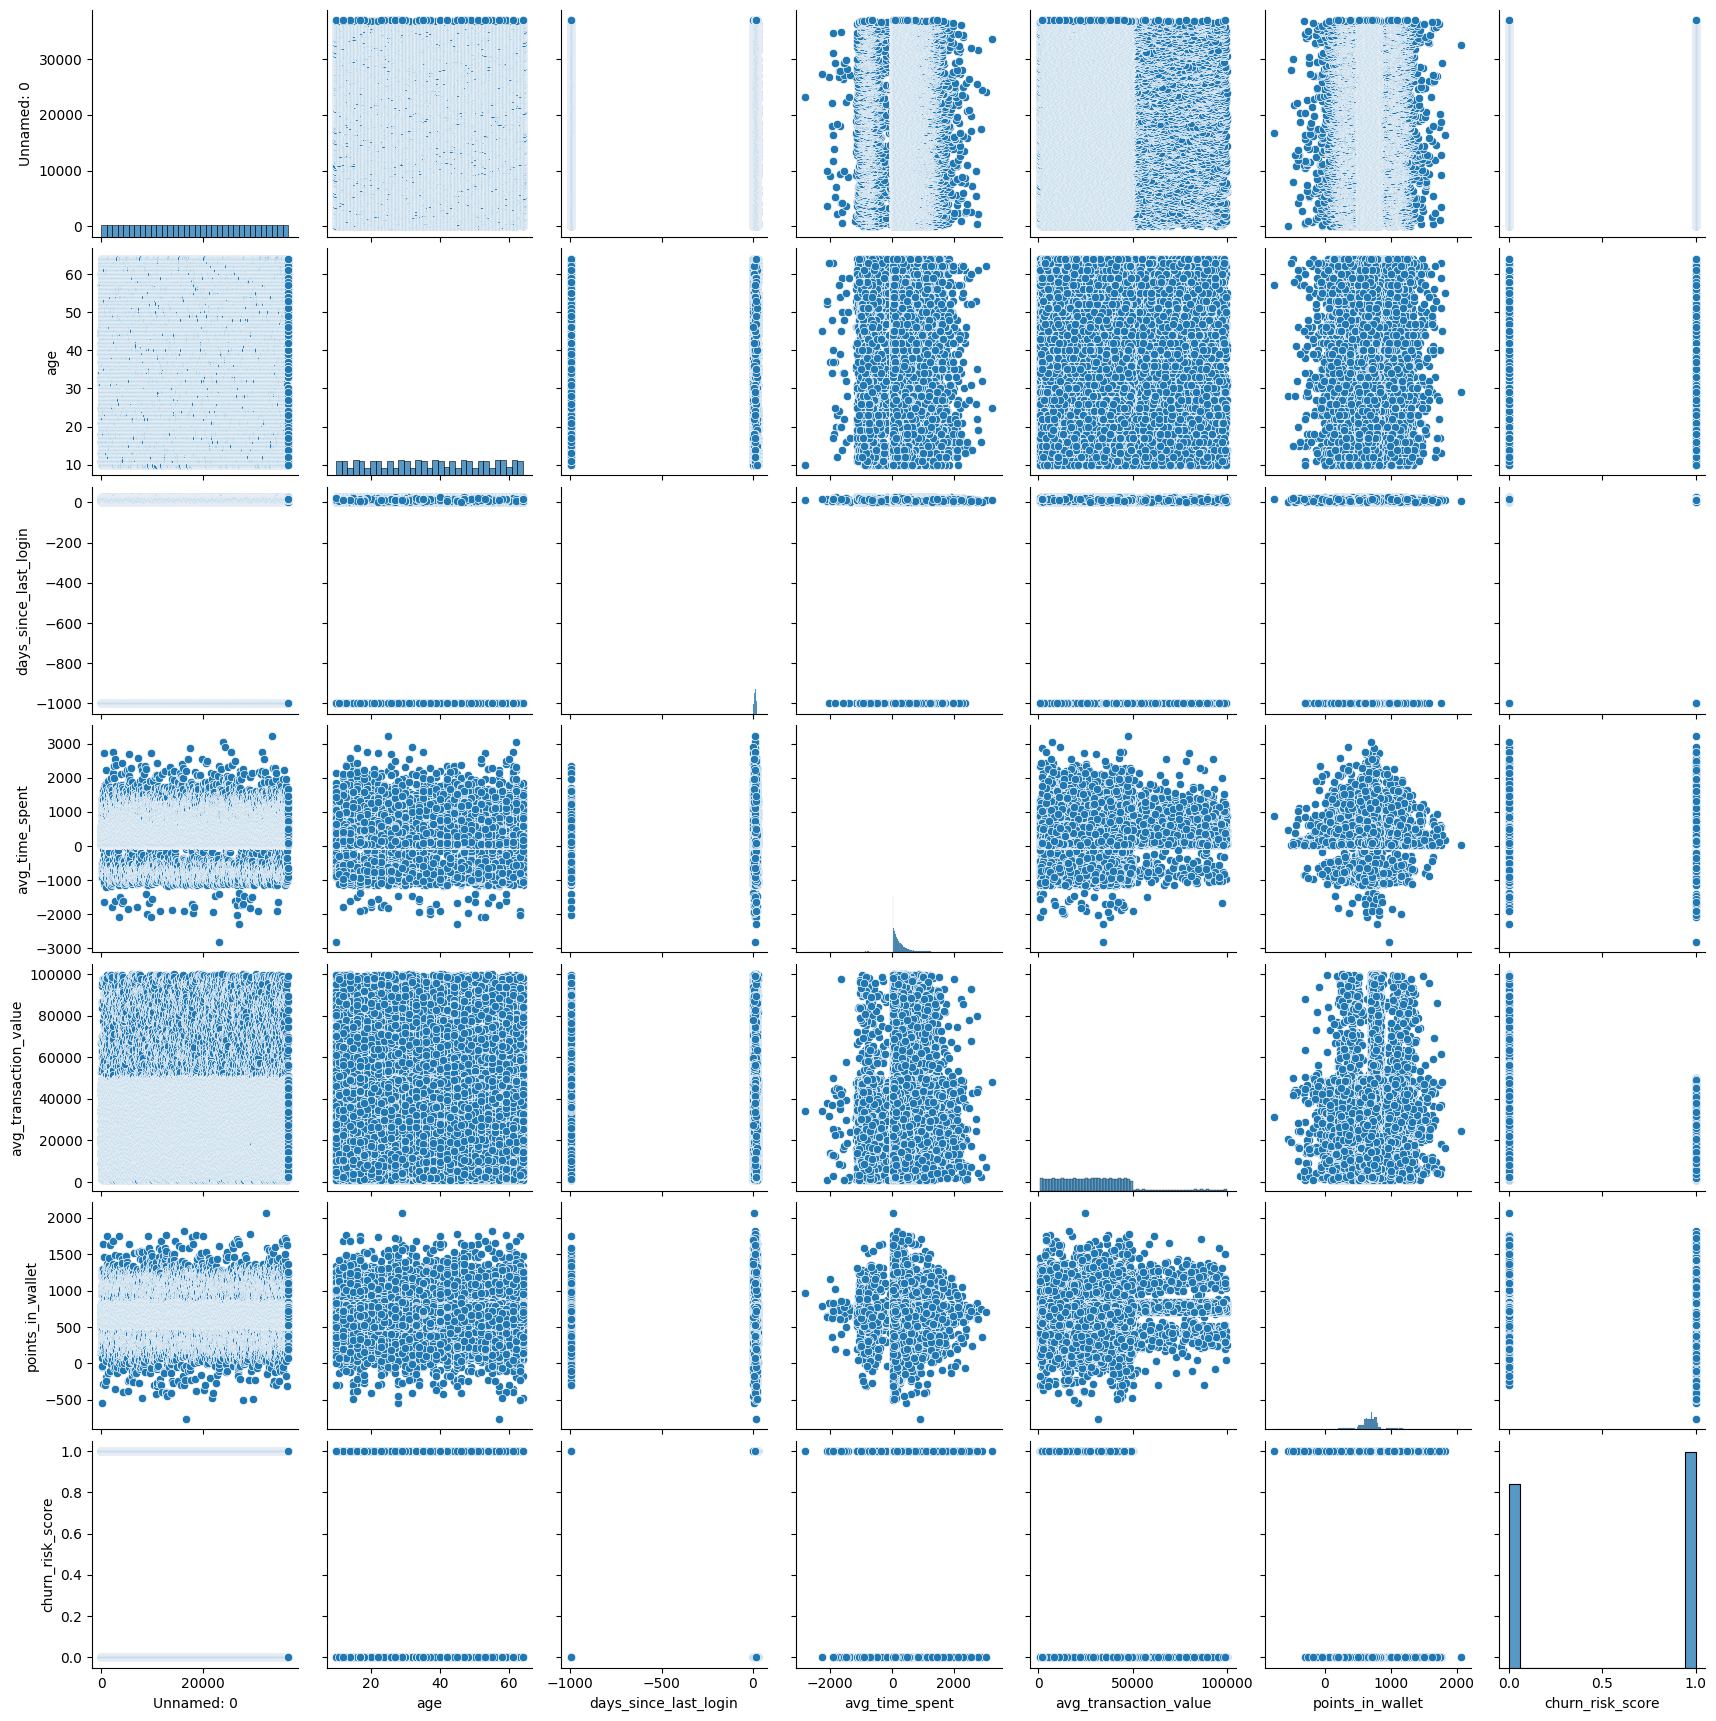

In [120]:
#pairplot

sns.pairplot(data)
plt.show()

<Axes: >

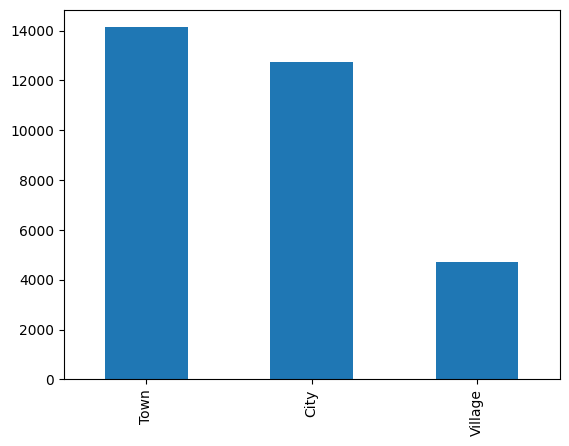

In [121]:
#bar plot

data['region_category'].value_counts().plot.bar()

<Axes: >

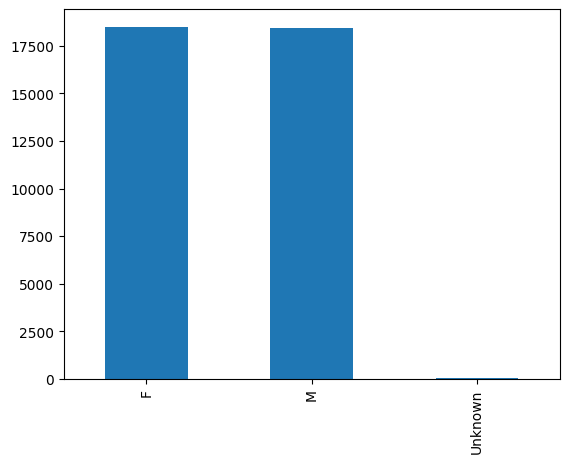

In [122]:
data['gender'].value_counts().plot.bar()

<Axes: >

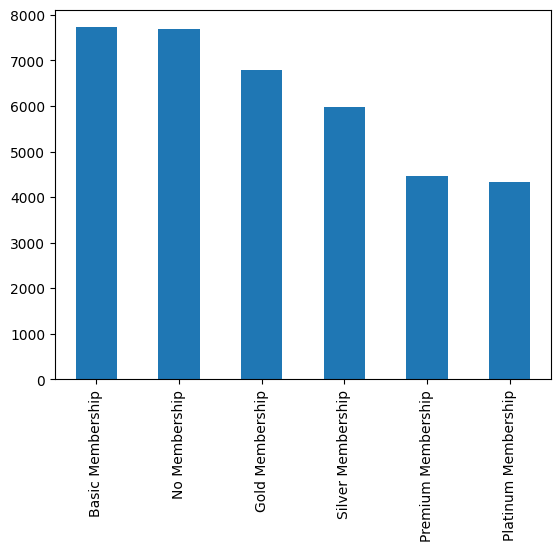

In [123]:
data['membership_category'].value_counts().plot.bar()

<Axes: >

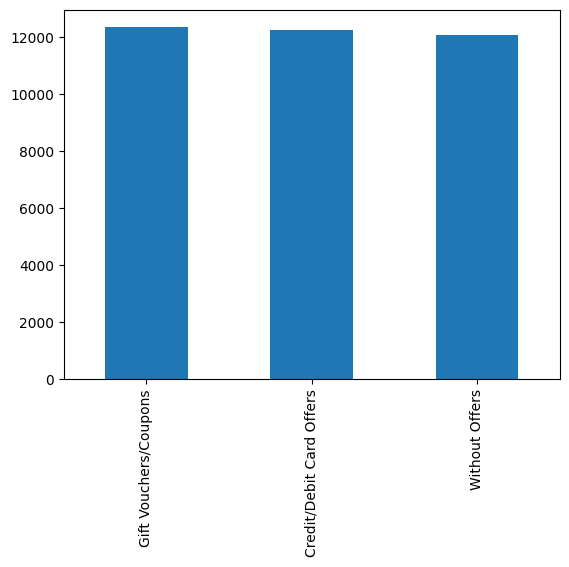

In [124]:
data['preferred_offer_types'].value_counts().plot.bar()

<Axes: >

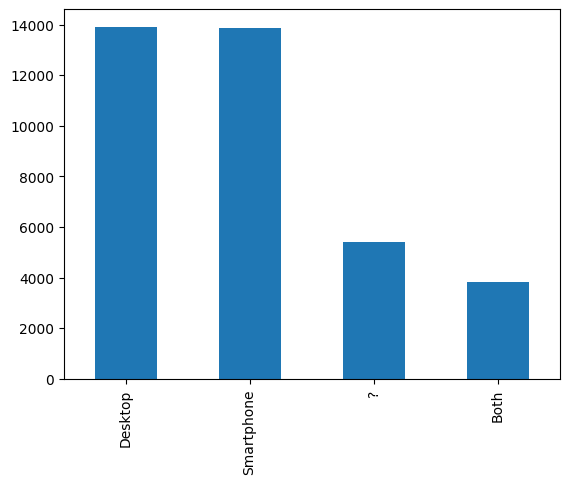

In [125]:
data['medium_of_operation'].value_counts().plot.bar()

<Axes: >

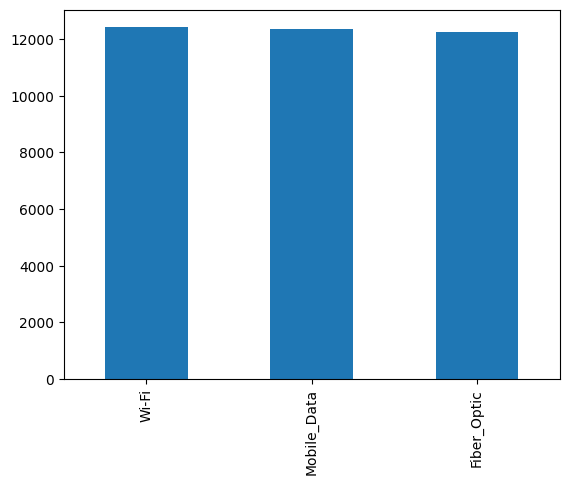

In [126]:
data['internet_option'].value_counts().plot.bar()

In [127]:
data['used_special_discount'].value_counts().plot.bar()

<Axes: >

<Axes: >

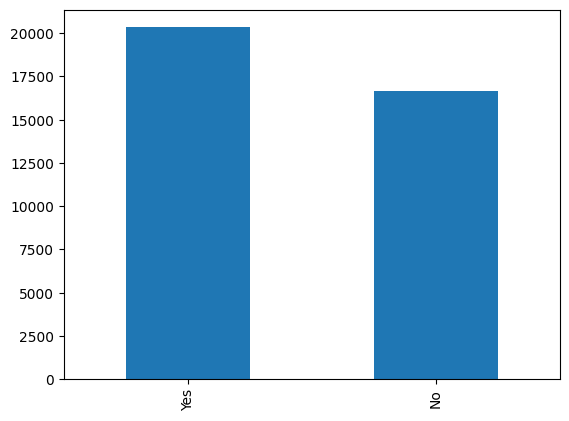

In [128]:
data['used_special_discount'].value_counts().plot.bar()

In [129]:
data['offer_application_preference'].value_counts().plot.bar()

<Axes: >

<Axes: >

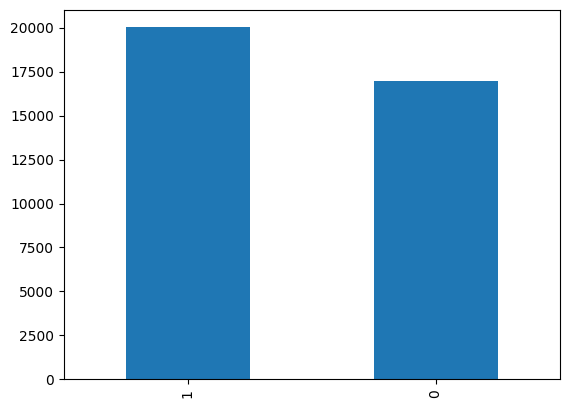

In [130]:
data['churn_risk_score'].value_counts().plot.bar()

In [131]:
data['complaint_status'].value_counts().plot.bar()

<Axes: >

In [132]:
data['feedback'].value_counts().plot.bar()

<Axes: >

In [133]:
#count plot


def CountPlot(xcolumn, xlabel, rotationangle=0):
    ax = sns.countplot(x = xcolumn,
                      hue = 'churn_risk_score',
                      data = data)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',xytext = (0, 8), textcoords = 'offset points')
    plt.title(f"Churn rate by {xlabel}", fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.xticks(rotation=rotationangle)
    plt.show() 

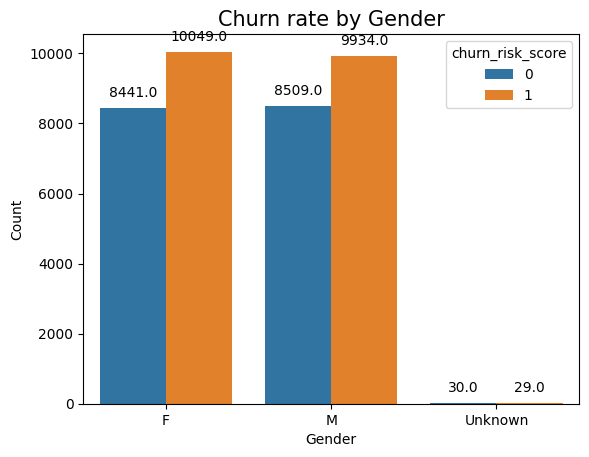

In [134]:
CountPlot("gender", "Gender")

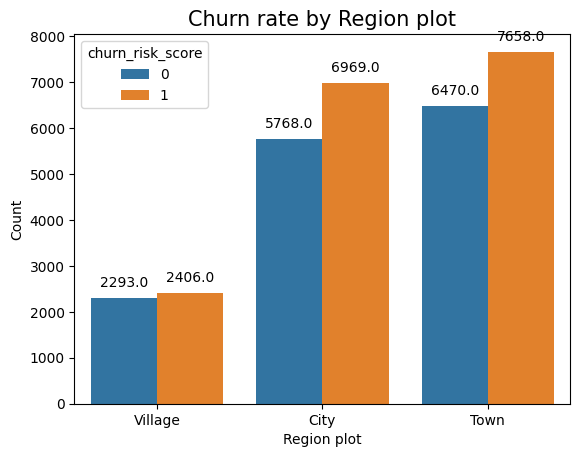

In [135]:
CountPlot('region_category','Region plot')

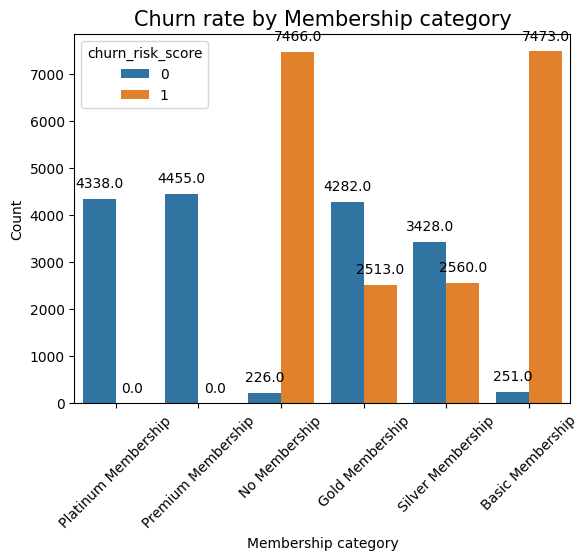

In [136]:
CountPlot('membership_category','Membership category',45)

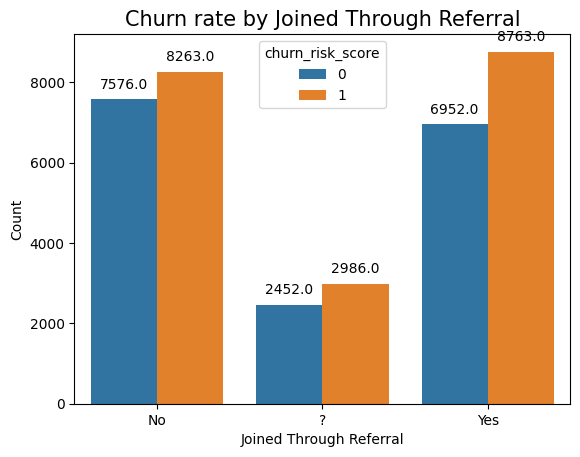

In [137]:
#Churn rate by joined_through_referral
CountPlot("joined_through_referral", "Joined Through Referral")

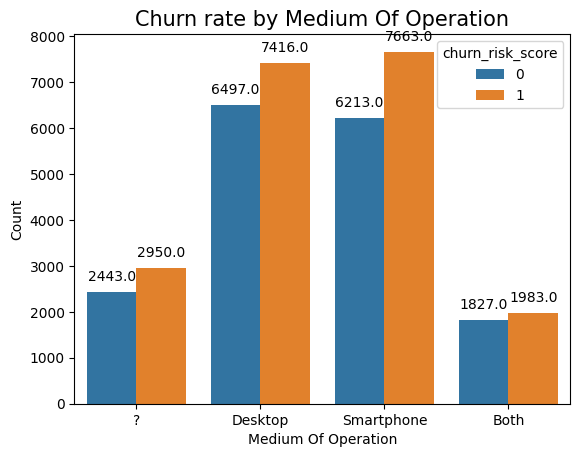

In [138]:
#Churn rate by medium_of_operation
CountPlot("medium_of_operation", "Medium Of Operation")

In [139]:
#Churn rate by complaint_status
CountPlot("complaint_status", "Complaint Status",30)

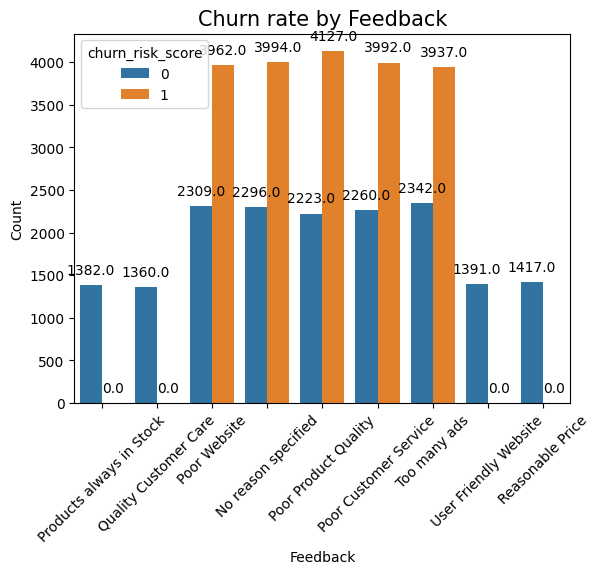

In [140]:
#Churn rate by feedback
CountPlot("feedback", "Feedback", 45)

In [141]:
CountPlot("used_special_discount", "Used Special Discount")

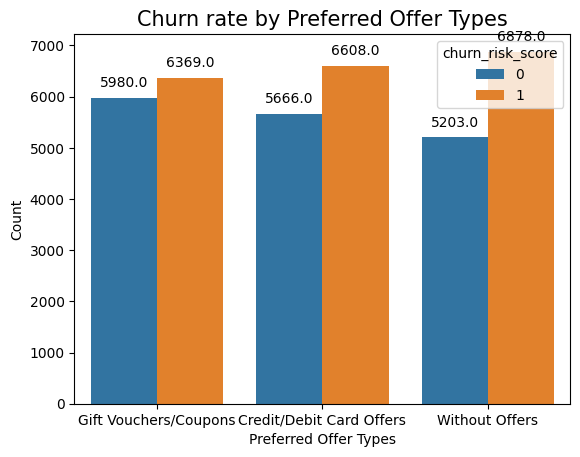

In [142]:
CountPlot("preferred_offer_types", "Preferred Offer Types")

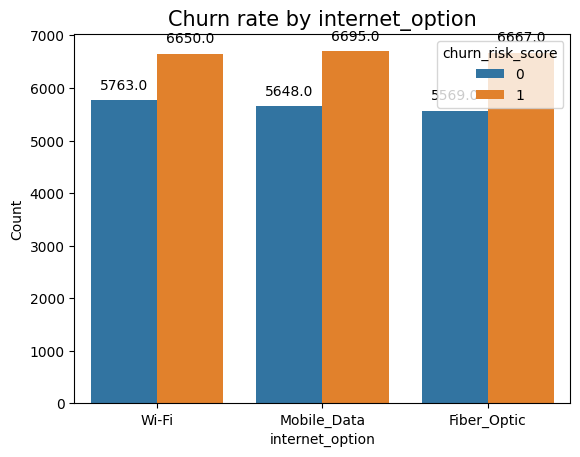

In [143]:
CountPlot("internet_option", "internet_option")

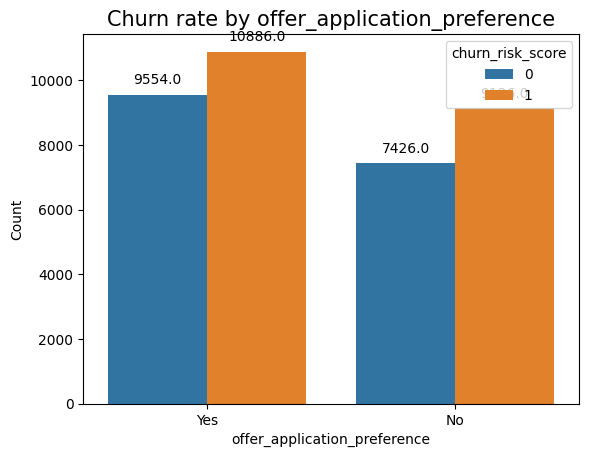

In [144]:
CountPlot("offer_application_preference", "offer_application_preference")

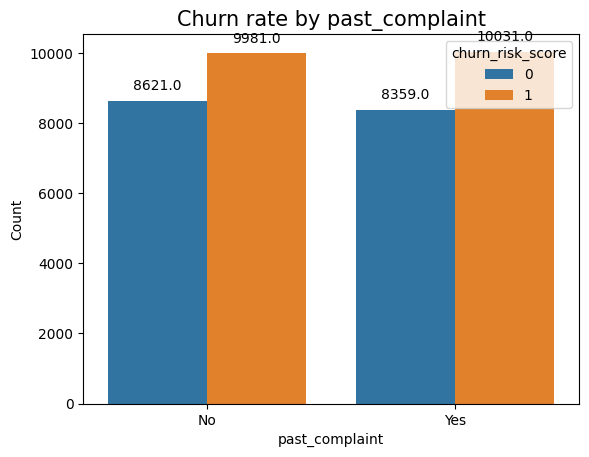

In [145]:
CountPlot("past_complaint", "past_complaint")

<ipython-input-146-362e30212f15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)


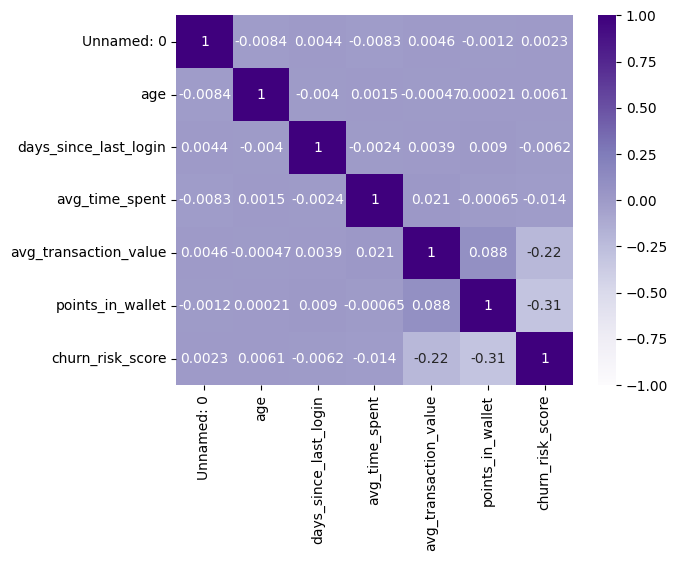

In [146]:
#heatmap
sns.heatmap(data.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

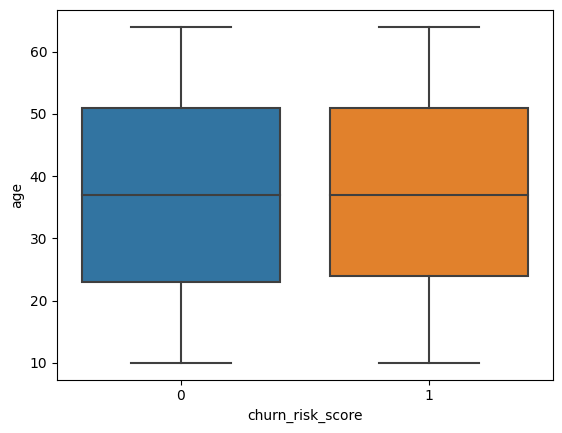

In [147]:
sns.boxplot(x="churn_risk_score", y="age",data=data) 
plt.show()

In [148]:
sns.boxplot(x="region_category", y="age",data=data) 
plt.show()

#Preprocessing

In [149]:
#missing values

In [150]:
data.isna().sum()

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [151]:
data.dtypes

Unnamed: 0                        int64
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [152]:
data['region_category']=data['region_category'].fillna(data['region_category'].mode)

In [153]:
data['preferred_offer_types']=data['preferred_offer_types'].fillna(data['preferred_offer_types'].mode)

In [154]:
data['points_in_wallet']=data['points_in_wallet'].fillna(data['points_in_wallet'].median())

In [155]:
data.isna().sum()

Unnamed: 0                      0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

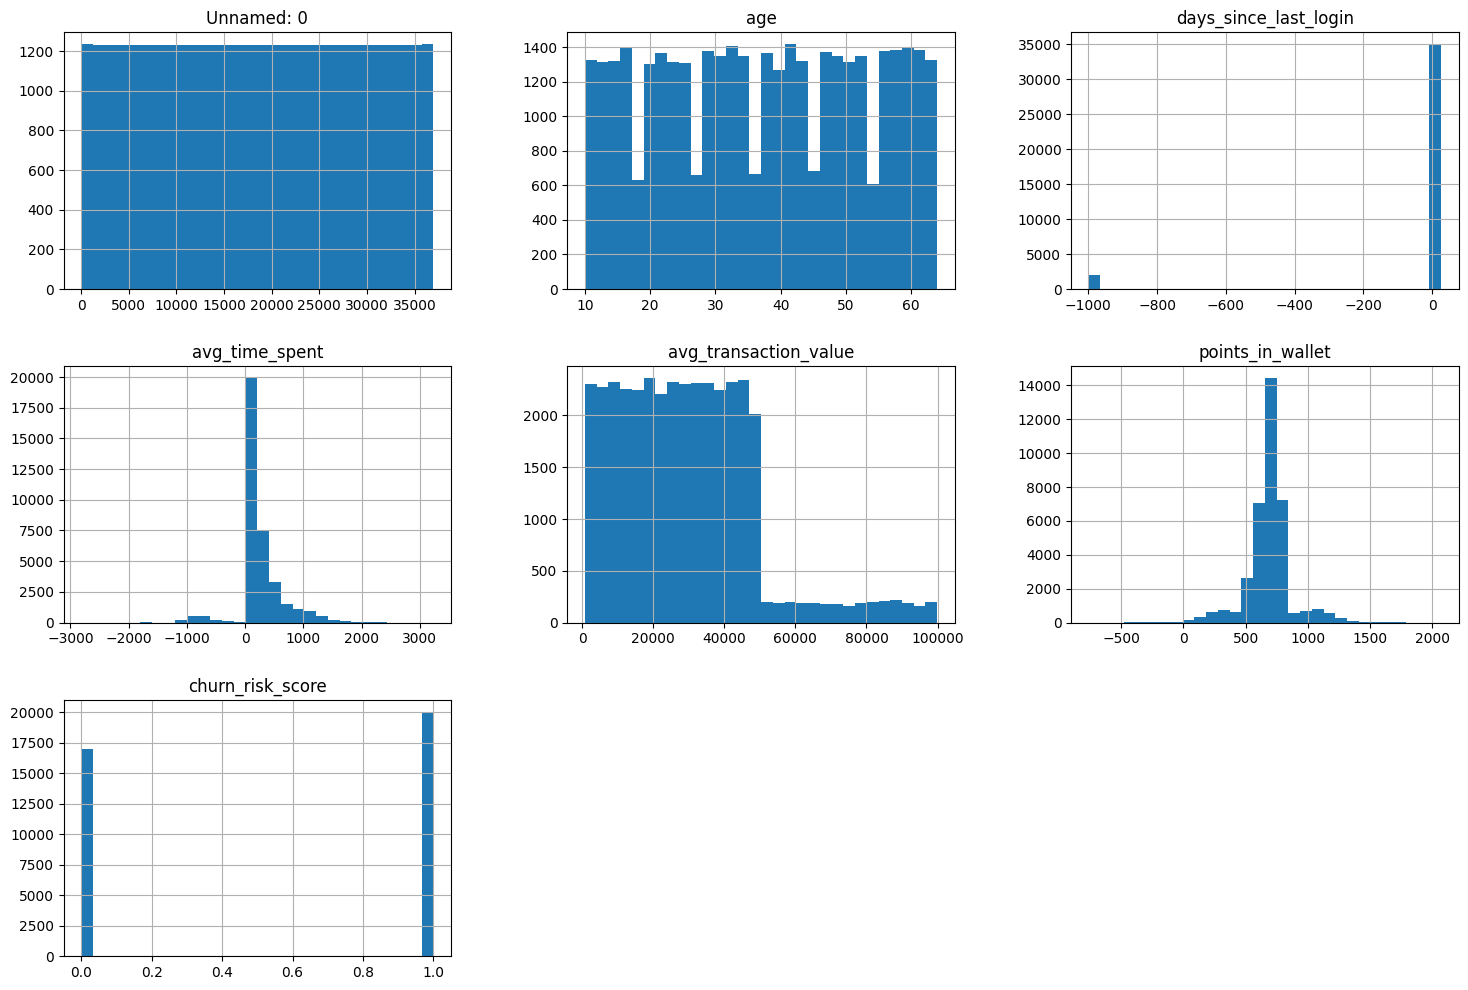

In [156]:
#histogram

data.hist(bins=30,figsize=(18,12))           
plt.show

                       their is no change so we can proceed

In [157]:
##encoding

In [158]:
data.dtypes

Unnamed: 0                        int64
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [159]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [160]:
for col in data.columns:
  if data[col].dtype=='object':
    data[col]=label_encoder.fit_transform(data[col].astype(str))

In [161]:
data.dtypes

Unnamed: 0                        int64
age                               int64
gender                            int64
security_no                       int64
region_category                   int64
membership_category               int64
joining_date                      int64
joined_through_referral           int64
referral_id                       int64
preferred_offer_types             int64
medium_of_operation               int64
internet_option                   int64
last_visit_time                   int64
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days          int64
points_in_wallet                float64
used_special_discount             int64
offer_application_preference      int64
past_complaint                    int64
complaint_status                  int64
feedback                          int64
churn_risk_score                  int64
dtype: object

In [162]:
##outlier

In [163]:
data.describe()

Unnamed: 0           age        gender   security_no  \
count  36992.000000  36992.000000  36992.000000  36992.000000   
mean   18495.500000     37.118161      0.501757  18495.500000   
std    10678.814916     15.867412      0.503184  10678.814916   
min        0.000000     10.000000      0.000000      0.000000   
25%     9247.750000     23.000000      0.000000   9247.750000   
50%    18495.500000     37.000000      1.000000  18495.500000   
75%    27743.250000     51.000000      1.000000  27743.250000   
max    36991.000000     64.000000      2.000000  36991.000000   

       region_category  membership_category  joining_date  \
count     36992.000000         36992.000000  36992.000000   
mean          1.489241             2.242458    550.206937   
std           0.892989             1.736675    317.860926   
min           0.000000             0.000000      0.000000   
25%           1.000000             1.000000    273.000000   
50%           2.000000             2.000000    551.000000   
75%           2.000000             4.000000    826.000000   
max           3.000000             5.000000   1095.000000   

       joined_through_referral   referral_id  preferred_offer_types  ...  \
count             36992.000000  36992.000000           36992.000000  ...   
mean                  1.277817   8414.647654               1.979212  ...   
std                   0.703319   3688.789508               0.830129  ...   
min                   0.000000      0.000000               0.000000  ...   
25%                   1.000000   5481.750000               1.000000  ...   
50%                   1.000000  10967.500000               2.000000  ...   
75%                   2.000000  11358.000000               3.000000  ...   
max                   2.000000  11358.000000               3.000000  ...   

       avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
count    36992.000000           36992.000000              36992.000000   
mean       243.472334           29271.194003               1008.058499   
std        398.289149           19444.806226                400.211473   
min      -2814.109110             800.460000                  0.000000   
25%         60.102500           14177.540000                743.000000   
50%        161.765000           27554.485000                780.000000   
75%        356.515000           40855.110000               1521.000000   
max       3235.578521           99914.050000               1653.000000   

       points_in_wallet  used_special_discount  offer_application_preference  \
count      36992.000000           36992.000000                  36992.000000   
mean         687.881611               0.549903                      0.552552   
std          184.838012               0.497510                      0.497237   
min         -760.661236               0.000000                      0.000000   
25%          624.350000               0.000000                      0.000000   
50%          697.620000               1.000000                      1.000000   
75%          757.002500               1.000000                      1.000000   
max         2069.069761               1.000000                      1.000000   

       past_complaint  complaint_status      feedback  churn_risk_score  
count    36992.000000      36992.000000  36992.000000      36992.000000  
mean         0.497135          1.625946      3.072989          0.540982  
std          0.499999          1.216914      2.560848          0.498324  
min          0.000000          0.000000      0.000000          0.000000  
25%          0.000000          1.000000      1.000000          0.000000  
50%          0.000000          1.000000      2.000000          1.000000  
75%          1.000000          2.000000      5.000000          1.000000  
max          1.000000          4.000000      8.000000          1.000000  

[8 rows x 24 columns]

In [164]:
#boxplot


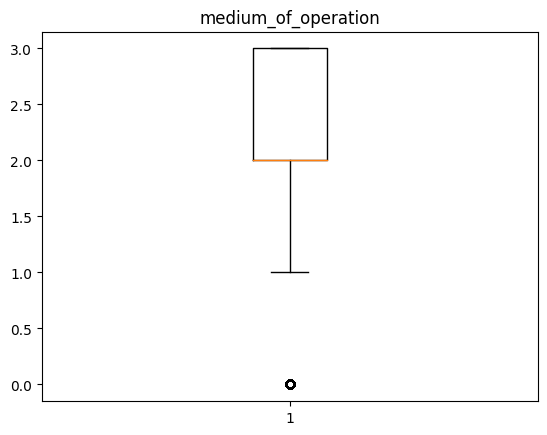

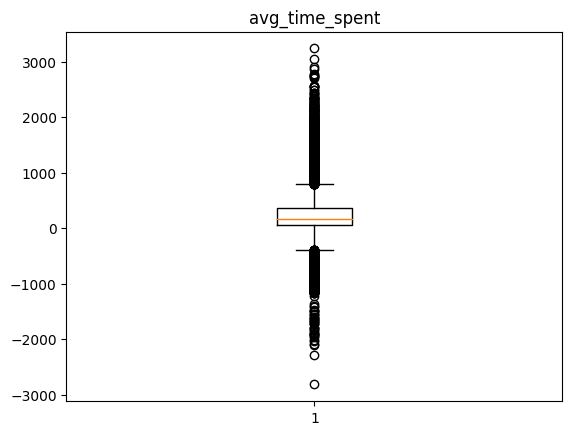

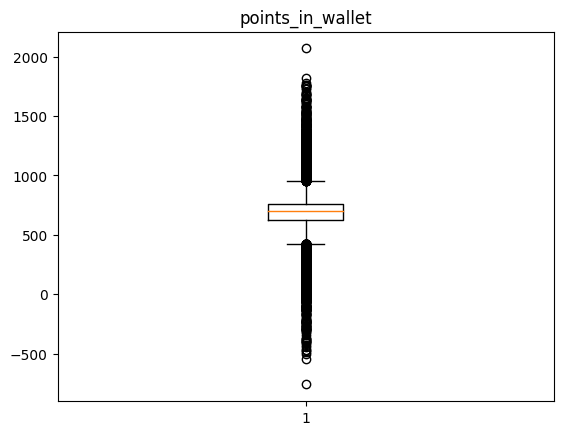

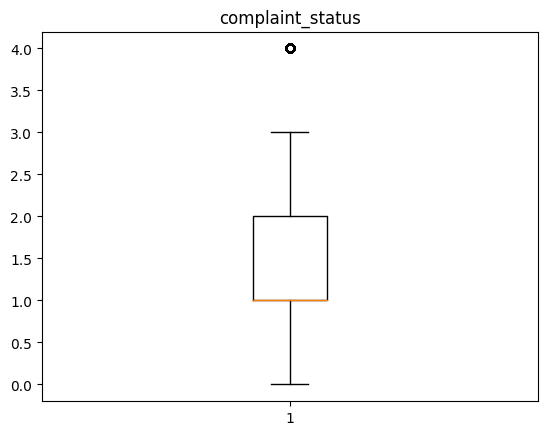

In [165]:
for i in['medium_of_operation','days_since_last_login',
       'avg_time_spent', 'avg_transaction_value',
       'points_in_wallet',
       'complaint_status']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [166]:
#capping method
def iqr_capping(data1,variables):
  Q1=data1[variables].quantile(0.25)
  Q3=data1[variables].quantile(0.75)
  IQR=Q3-Q1
  upp_limit=Q3+(1.5*IQR)
  low_limit=Q1-(1.5*IQR)
  return low_limit,upp_limit

In [167]:
low_medium,upp_medium=iqr_capping(data,'medium_of_operation')
print('lower medium=',low_medium)
print('upper medium=',upp_medium)
data['medium_of_operation']=np.where(data['medium_of_operation']>upp_medium,upp_medium,
                          np.where(data['medium_of_operation']<low_medium,low_medium,data['medium_of_operation']))

lower medium= 0.5
upper medium= 4.5


In [168]:
low_last_login,upp_last_login=iqr_capping(data,'days_since_last_login')
print('lower last login=',low_last_login)
print('upper last login=',upp_last_login)
data['days_since_last_login']=np.where(data['days_since_last_login']>upp_last_login,upp_last_login,
                          np.where(data['days_since_last_login']<low_last_login,low_last_login,data['days_since_last_login']))

lower last login= -4.0
upper last login= 28.0


In [169]:
low_time_spent,upp_time_spent=iqr_capping(data,'avg_time_spent')
print('lower time spent=',low_time_spent)
print('upper time spent=',upp_time_spent)
data['avg_time_spent']=np.where(data['avg_time_spent']>upp_time_spent,upp_time_spent,
                          np.where(data['avg_time_spent']<low_time_spent,low_time_spent,data['avg_time_spent']))

lower time spent= -384.51624999999996
upper time spent= 801.13375


In [170]:
low_transaction_value,upp_transaction_value=iqr_capping(data,'avg_transaction_value')
print('lower transaction value=',low_transaction_value)
print('upper transaction value=',upp_transaction_value)
data['avg_transaction_value']=np.where(data['avg_transaction_value']>upp_transaction_value,upp_transaction_value,
                          np.where(data['avg_transaction_value']<low_transaction_value,low_transaction_value,data['avg_transaction_value']))

lower transaction value= -25838.814999999995
upper transaction value= 80871.465


In [171]:
low_points,upp_points=iqr_capping(data,'points_in_wallet')
print('lower points=',low_points)
print('upper points=',upp_points)
data['points_in_wallet']=np.where(data['points_in_wallet']>upp_points,upp_points,
                          np.where(data['points_in_wallet']<low_points,low_points,data['points_in_wallet']))

lower points= 425.37125
upper points= 955.98125


In [172]:
low_complaint,upp_complaint=iqr_capping(data,'complaint_status')
print('lower complaint=',low_complaint)
print('upper complaint=',upp_complaint)
data['complaint_status']=np.where(data['complaint_status']>upp_complaint,upp_complaint,
                          np.where(data['complaint_status']<low_complaint,low_complaint,data['complaint_status']))

lower complaint= -0.5
upper complaint= 3.5


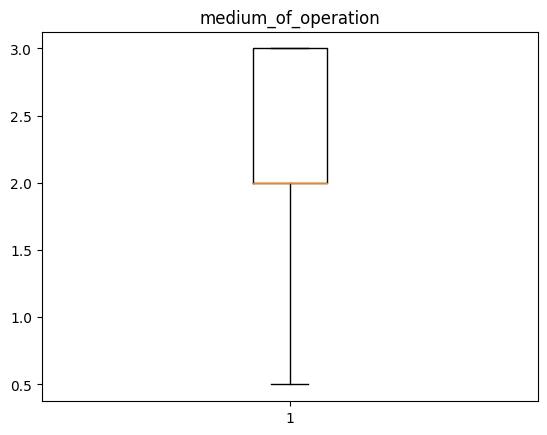

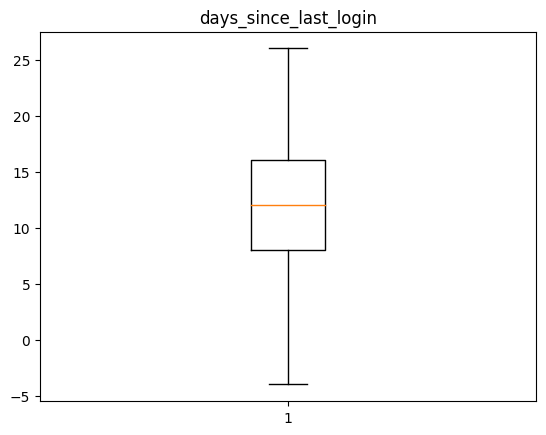

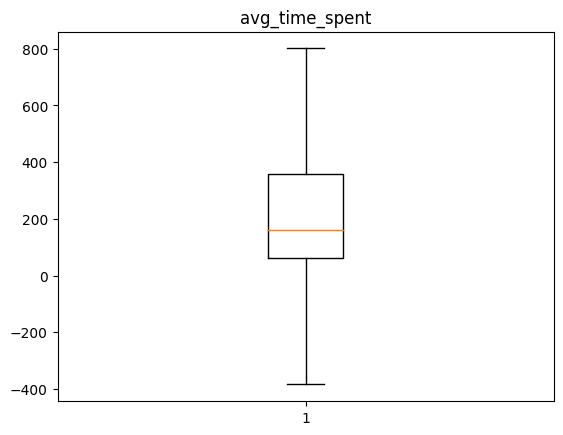

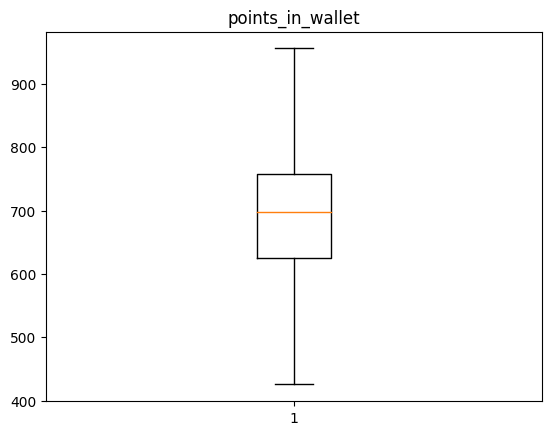

In [173]:
for i in['medium_of_operation','days_since_last_login',
       'avg_time_spent', 'avg_transaction_value',
       'points_in_wallet',
       'complaint_status']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [174]:
#correlation

<Axes: >

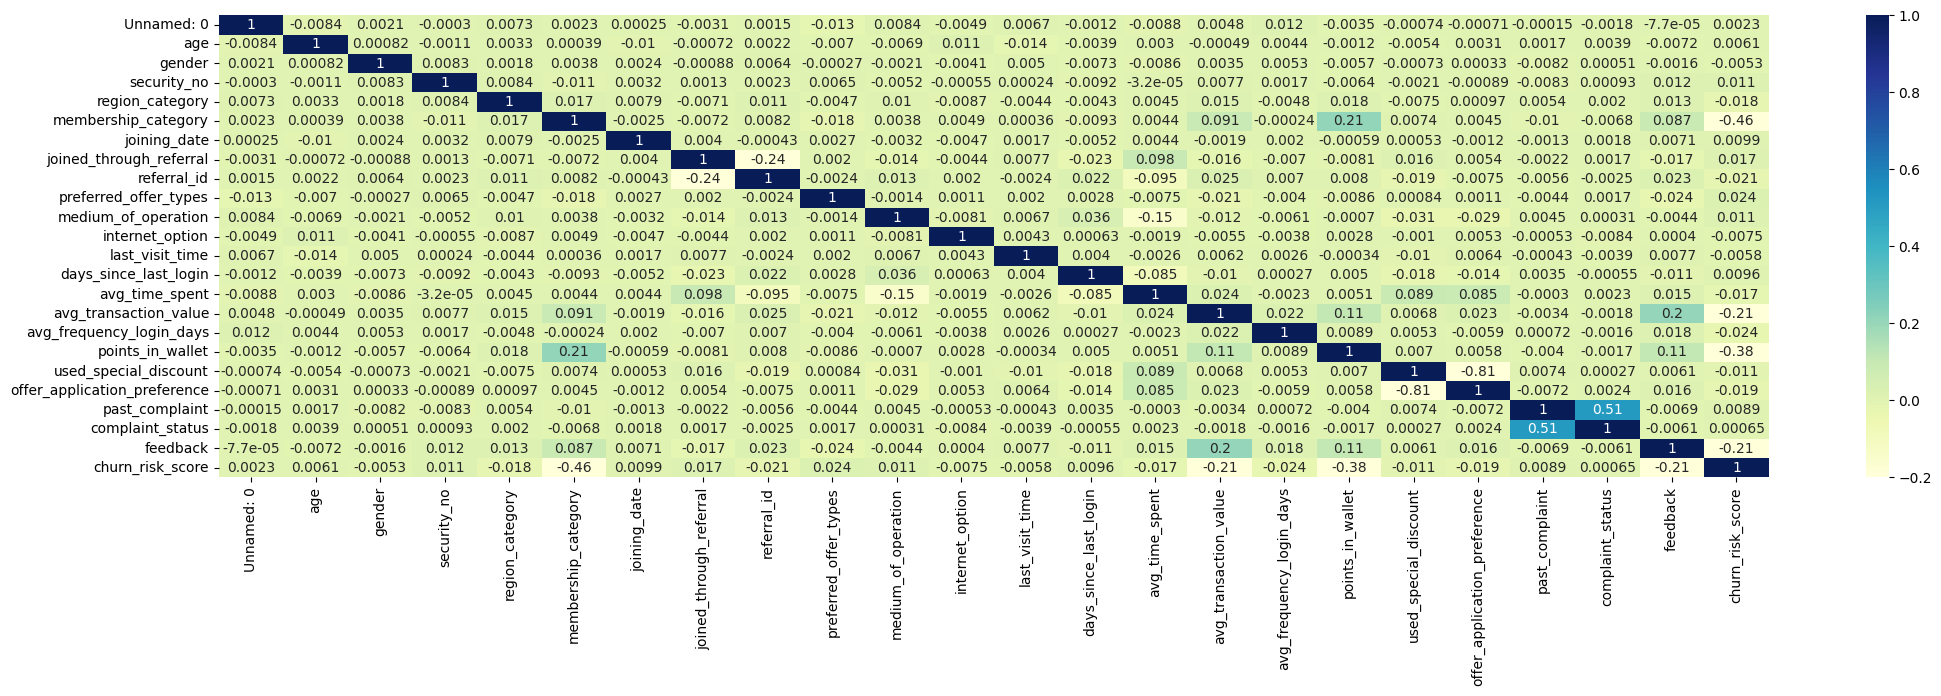

In [175]:
corrmatrix=data.corr()
plt.subplots(figsize=(25,6))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

In [176]:
data.drop('used_special_discount',axis=1,inplace=True)
data.describe()

Unnamed: 0           age        gender   security_no  \
count  36992.000000  36992.000000  36992.000000  36992.000000   
mean   18495.500000     37.118161      0.501757  18495.500000   
std    10678.814916     15.867412      0.503184  10678.814916   
min        0.000000     10.000000      0.000000      0.000000   
25%     9247.750000     23.000000      0.000000   9247.750000   
50%    18495.500000     37.000000      1.000000  18495.500000   
75%    27743.250000     51.000000      1.000000  27743.250000   
max    36991.000000     64.000000      2.000000  36991.000000   

       region_category  membership_category  joining_date  \
count     36992.000000         36992.000000  36992.000000   
mean          1.489241             2.242458    550.206937   
std           0.892989             1.736675    317.860926   
min           0.000000             0.000000      0.000000   
25%           1.000000             1.000000    273.000000   
50%           2.000000             2.000000    551.000000   
75%           2.000000             4.000000    826.000000   
max           3.000000             5.000000   1095.000000   

       joined_through_referral   referral_id  preferred_offer_types  ...  \
count             36992.000000  36992.000000           36992.000000  ...   
mean                  1.277817   8414.647654               1.979212  ...   
std                   0.703319   3688.789508               0.830129  ...   
min                   0.000000      0.000000               0.000000  ...   
25%                   1.000000   5481.750000               1.000000  ...   
50%                   1.000000  10967.500000               2.000000  ...   
75%                   2.000000  11358.000000               3.000000  ...   
max                   2.000000  11358.000000               3.000000  ...   

       days_since_last_login  avg_time_spent  avg_transaction_value  \
count           36992.000000    36992.000000           36992.000000   
mean               11.852941      231.870983           28986.181367   
std                 6.613070      269.346109           18575.108055   
min                -4.000000     -384.516250             800.460000   
25%                 8.000000       60.102500           14177.540000   
50%                12.000000      161.765000           27554.485000   
75%                16.000000      356.515000           40855.110000   
max                26.000000      801.133750           80871.465000   

       avg_frequency_login_days  points_in_wallet  \
count              36992.000000      36992.000000   
mean                1008.058499        688.489889   
std                  400.211473        123.532613   
min                    0.000000        425.371250   
25%                  743.000000        624.350000   
50%                  780.000000        697.620000   
75%                 1521.000000        757.002500   
max                 1653.000000        955.981250   

       offer_application_preference  past_complaint  complaint_status  \
count                  36992.000000    36992.000000      36992.000000   
mean                       0.552552        0.497135          1.563176   
std                        0.497237        0.499999          1.100126   
min                        0.000000        0.000000          0.000000   
25%                        0.000000        0.000000          1.000000   
50%                        1.000000        0.000000          1.000000   
75%                        1.000000        1.000000          2.000000   
max                        1.000000        1.000000          3.500000   

           feedback  churn_risk_score  
count  36992.000000      36992.000000  
mean       3.072989          0.540982  
std        2.560848          0.498324  
min        0.000000          0.000000  
25%        1.000000          0.000000  
50%        2.000000          1.000000  
75%        5.000000          1.000000  
max        8.000000          1.000000  

[8 rows x 23 columns]

In [177]:
#scaling

In [178]:
#stnd scaling

In [179]:
y=data['churn_risk_score']
x=data.drop(['churn_risk_score'],axis=1)

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [181]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [182]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [183]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precisiom is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 is',f1_score(y_test,y_pred,average='macro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.7624351211072664
Precisiom is 0.7612920668324679
Recall is 0.7590945053951413
F1 is 0.7598744757912625


array([[3048, 1192],
       [1005, 4003]])

In [184]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [185]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.8884083044982699
[[3753  487]
 [ 545 4463]]


In [186]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [187]:
y_pred=rf_clf.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [188]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.9252811418685121
[[3849  391]
 [ 300 4708]]


In [189]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)


for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

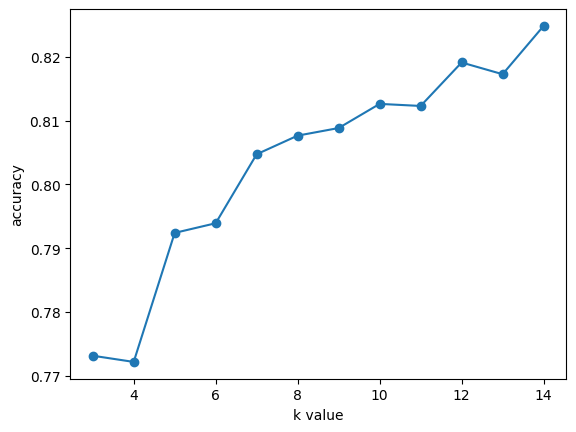

In [190]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid

In [191]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [192]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precisiom is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('F1 is',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.8248269896193772
Precisiom is 0.8281673769856644
Recall is 0.8536341853035144
F1 is 0.84070796460177


array([[3353,  887],
       [ 733, 4275]])

In [193]:
#svm

from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [194]:
y_pred=svmclf.predict(x_test)

In [195]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.8139057093425606


In [198]:
#hyper parameter tuning

rf_clf=RandomForestClassifier(n_estimators=30,max_depth=10,criterion='entropy',min_samples_split=9,random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=9,
                       n_estimators=30, random_state=42)

In [199]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.9219290657439446
[[3844  396]
 [ 326 4682]]
